## Meta -

This file shows an MLP built for the MNIST dataset and subsequent variations tried out

## Author - Rahul Suresh

In [28]:
from __future__ import print_function
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
from keras import regularizers

In [3]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
print('Training data shape : ', train_images.shape, train_labels.shape)
 
print('Testing data shape : ', test_images.shape, test_labels.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [5]:
# Find the unique numbers from the train labels
classes = np.unique(train_labels)
nClasses = len(classes)

In [6]:
print(nClasses)

10


In [7]:
#set the plotter
plt.figure(figsize=[10,5])


<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Ground Truth : 0')

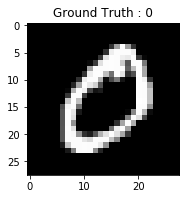

In [8]:
plt.subplot(121)
plt.imshow(train_images[1], cmap="gray")
plt.title("Ground Truth : {}".format(train_labels[1]))

In [9]:
train_images[1].shape

(28, 28)

In [10]:
# Change from matrix to array of dimension 28x28 to array of dimention 784
dimData=np.prod(train_images.shape[1:])

In [11]:
dimData

784

In [12]:
train_data = train_images.reshape(train_images.shape[0], dimData)
test_data = test_images.reshape(test_images.shape[0], dimData)

In [13]:
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

In [14]:
train_data /= 255
test_data /= 255

In [15]:
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [16]:
print('Original label 0 : ', train_labels[0])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[0])


Original label 0 :  5
After conversion to categorical ( one-hot ) :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [17]:
from keras.models import Sequential
from keras.layers import Dense

In [18]:
model=Sequential()
model.add(Dense(512,activation='relu',input_shape=(dimData,), kernel_initializer='glorot_uniform'))
model.add(Dense(512,activation='relu',kernel_initializer='glorot_uniform'))
model.add(Dense(nClasses,activation='softmax',kernel_initializer='glorot_uniform'))

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [22]:
#from keras.utils import plot_model
#plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [23]:
#from IPython.display import Image
#Image("model.png")

In [24]:
model.compile(optimizer='rmsprop', loss='kullback_leibler_divergence', metrics=['accuracy'])

In [25]:
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1, 
                   validation_data=(test_data, test_labels_one_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 102us/step - loss: 0.2747 - acc: 0.9149 - val_loss: 0.1578 - val_acc: 0.9506
Epoch 2/20
60000/60000 [==============================] - 6s 98us/step - loss: 0.0937 - acc: 0.9710 - val_loss: 0.0756 - val_acc: 0.9769
Epoch 3/20
60000/60000 [==============================] - 6s 98us/step - loss: 0.0581 - acc: 0.9817 - val_loss: 0.0993 - val_acc: 0.9689
Epoch 4/20
60000/60000 [==============================] - 6s 104us/step - loss: 0.0411 - acc: 0.9871 - val_loss: 0.0665 - val_acc: 0.9782
Epoch 5/20
60000/60000 [==============================] - 7s 111us/step - loss: 0.0294 - acc: 0.9905 - val_loss: 0.0807 - val_acc: 0.9786
Epoch 6/20
60000/60000 [==============================] - 7s 112us/step - loss: 0.0238 - acc: 0.9926 - val_loss: 0.0778 - val_acc: 0.9795
Epoch 7/20
60000/60000 [==============================] - 5s 91us/step - loss: 0.0166 - acc: 0.9946 - val_loss: 0.0956 - val

In [26]:
model.save("MNISTMLP.hdf5")

In [29]:
reload_filename='MNISTMLP.hdf5'
model = load_model(reload_filename)

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [ ]:
[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)

In [ ]:
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

In [51]:
from keras.layers import Dropout

model_reg=Sequential()
model_reg.add(Dense(512,activation='relu',input_shape=(dimData,), kernel_initializer='glorot_uniform'))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(512,activation='relu',kernel_initializer='glorot_uniform'))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(nClasses,activation='softmax',kernel_initializer='glorot_uniform'))

In [52]:
model_reg.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [53]:
from keras.utils import plot_model
from IPython.display import Image

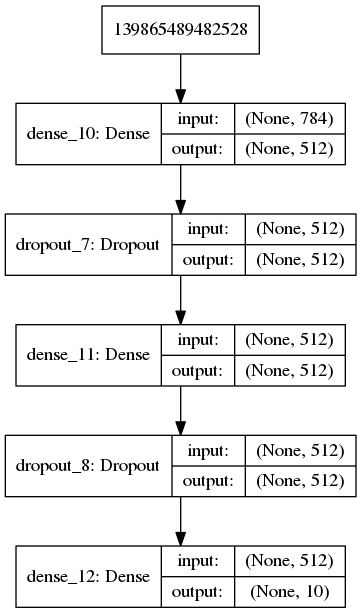

In [54]:
plot_model(model_reg, to_file='model_reg.png', show_shapes=True, show_layer_names=True)
Image("model_reg.png")

In [55]:
model_reg.compile(optimizer='nadam', loss='kullback_leibler_divergence', metrics=['accuracy'])

In [56]:
history = model_reg.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1, 
                   validation_data=(test_data, test_labels_one_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 135us/step - loss: 0.3395 - acc: 0.8954 - val_loss: 0.1234 - val_acc: 0.9613
Epoch 2/20
60000/60000 [==============================] - 8s 126us/step - loss: 0.1588 - acc: 0.9516 - val_loss: 0.0944 - val_acc: 0.9712
Epoch 3/20
60000/60000 [==============================] - 7s 121us/step - loss: 0.1257 - acc: 0.9615 - val_loss: 0.0785 - val_acc: 0.9747
Epoch 4/20
60000/60000 [==============================] - 7s 121us/step - loss: 0.1065 - acc: 0.9675 - val_loss: 0.0750 - val_acc: 0.9774
Epoch 5/20
60000/60000 [==============================] - 7s 124us/step - loss: 0.0970 - acc: 0.9700 - val_loss: 0.0705 - val_acc: 0.9775
Epoch 6/20
60000/60000 [==============================] - 7s 116us/step - loss: 0.0878 - acc: 0.9728 - val_loss: 0.0721 - val_acc: 0.9785
Epoch 7/20
60000/60000 [==============================] - 7s 117us/step - loss: 0.0830 - acc: 0.9742 - val_loss: 0.0677 - 

Text(0.5, 1.0, 'Loss Curves')

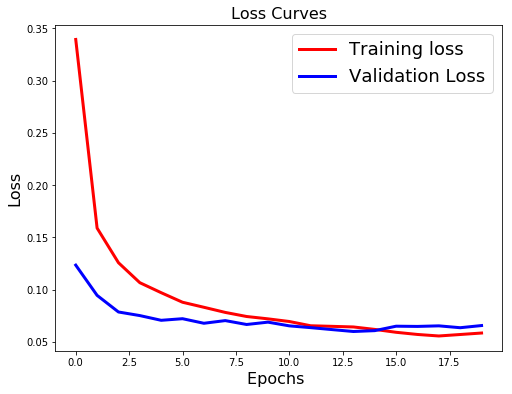

In [57]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5, 1.0, 'Accuracy Curves')

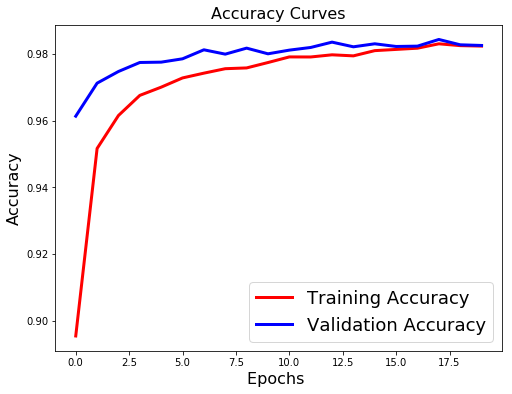

In [58]:
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [ ]:
[test_loss, test_acc] = model_reg.evaluate(test_data, test_labels_one_hot)

In [ ]:
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))